<a href="https://colab.research.google.com/github/ingu627/TIL/blob/master/dv_day5_hyunseok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
목표(종속)변수 : SalePrice

독립변수 : 나머지 변수들

1. 목표 변수 값에 영향을 미치는 요인 변수?

MSZoning, Condition1, YearBuilt, Bedroom

2. 시각화

독립변수 전체와 SalePrice 관계

- (x 축) MSZoning, Street, Alley, LotShape ...의 종류에 따른 SalePrice를 boxplot 형태로 표현

- pairplot

3. 상관계수
'''

'\n목표(종속)변수 : SalePrice\n\n독립변수 : 나머지 변수들\n\n1. 목표 변수 값에 영향을 미치는 요인 변수?\n\nMSZoning, Condition1, YearBuilt, Bedroom\n\n2. 시각화\n\n독립변수 전체와 SalePrice 관계\n\n- (x 축) MSZoning, Street, Alley, LotShape ...의 종류에 따른 SalePrice를 boxplot 형태로 표현\n\n- pairplot\n\n3. 상관계수\n'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import statsmodels.api as sm

In [ ]:
# !kaggle competitions download -c house-prices-advanced-regression-techniques

In [ ]:
# !unzip '*.zip'

In [ ]:
# !pip install kaggle

In [ ]:
house = pd.read_csv('./train.csv')
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
house.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

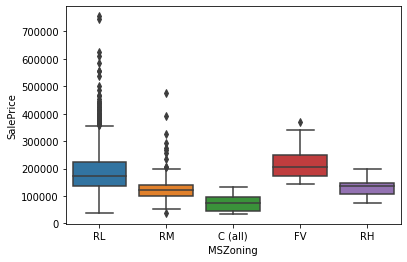

In [ ]:
sns.boxplot(x='MSZoning', y='SalePrice', data=house)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


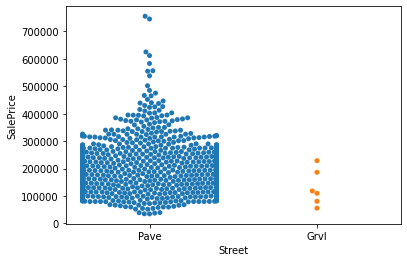

In [ ]:
sns.swarmplot(x='Street', y='SalePrice', data=house)

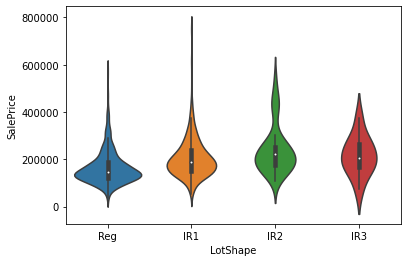

In [ ]:
sns.violinplot(x='LotShape', y='SalePrice', data=house)

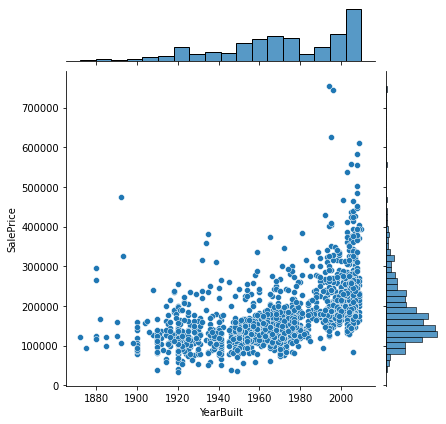

In [ ]:
sns.jointplot(
    x='YearBuilt', y='SalePrice', data=house)

In [ ]:
house_affect = house[['MSZoning', 'Condition1', 'YearBuilt', 'BedroomAbvGr']]
house_affect

,MSZoning,Condition1,YearBuilt,BedroomAbvGr
0,RL,Norm,2003,3
1,RL,Feedr,1976,3
2,RL,Norm,2001,3
3,RL,Norm,1915,3
4,RL,Norm,2000,4
...,...,...,...,...
1455,RL,Norm,1999,3
1456,RL,Norm,1978,3
1457,RL,Norm,1941,4
1458,RL,Norm,1950,2


In [ ]:
house_y = house[['SalePrice']]
house_y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [ ]:
house_affect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSZoning      1460 non-null   object
 1   Condition1    1460 non-null   object
 2   YearBuilt     1460 non-null   int64 
 3   BedroomAbvGr  1460 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 45.8+ KB


In [ ]:
X_cat = pd.get_dummies(house[['MSZoning', 'Condition1']])
X_num = house[['YearBuilt', 'BedroomAbvGr']]

X = pd.concat([X_cat, X_num], axis=1)
X

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,YearBuilt,BedroomAbvGr
0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2003,3
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1976,3
2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2001,3
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1915,3
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1999,3
1456,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1978,3
1457,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1941,4
1458,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1950,2


In [ ]:
house['houseAge'] = abs(house['YearBuilt'] - 2021)

In [ ]:
houseAge = house[['houseAge']]
bedroomAbvGr = house[['BedroomAbvGr']]
salePrice = house[['SalePrice']]

In [ ]:
houseAge1 = sm.add_constant(houseAge, has_constant='add')

In [ ]:
model1 = sm.OLS(salePrice, houseAge1)
fitted_model1 = model1.fit()

In [ ]:
fitted_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     548.7
Date:                Mon, 30 Aug 2021   Prob (F-statistic):          2.99e-103
Time:                        10:26:21   Log-Likelihood:                -18311.
No. Observations:                1460   AIC:                         3.663e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.493e+05   3416.162     72.983      0.000    2.43e+05    2.56e+05
houseAge   -1375.3735     58.717    -23.424      0.000   -1490.553   -1260.194
==============================================================================
Omnibus:                      761.903   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6856.947
Skew:                           2.264   Prob(JB):                         0.00
Kurtosis:                      12.603   Cond. No.                         112.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
pred1 = fitted_model1.predict(houseAge1)

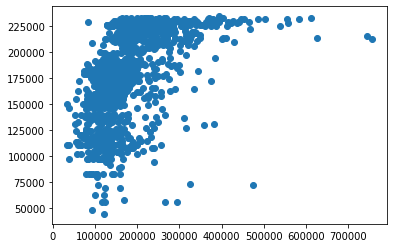

In [ ]:
plt.scatter(salePrice, pred1)

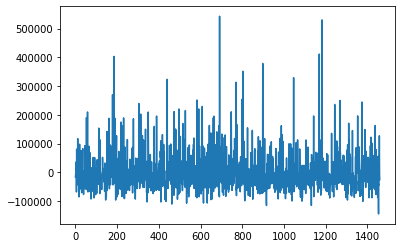

In [ ]:
fitted_model1.resid.plot()

In [ ]:
sum(fitted_model1.resid)

3.3440301194787025e-08

In [ ]:
X1 = sm.add_constant(X, has_constant='add')

In [ ]:
X1

,const,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,YearBuilt,BedroomAbvGr
0,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2003,3
1,1.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1976,3
2,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2001,3
3,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1915,3
4,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1999,3
1456,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1978,3
1457,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1941,4
1458,1.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1950,2


In [ ]:
multi_model2 = sm.OLS(salePrice, X1)
fitted_multi_model2 = multi_model2.fit()

In [ ]:
fitted_multi_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     51.58
Date:                Mon, 30 Aug 2021   Prob (F-statistic):          1.94e-116
Time:                        10:37:02   Log-Likelihood:                -18248.
No. Observations:                1460   AIC:                         3.653e+04
Df Residuals:                    1445   BIC:                         3.661e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -1.91e+06      1e+05    -19.056      0.000   -2.11e+06   -1.71e+06
MSZoning_C (all)  -3.983e+05   2.48e+04    -16.050      0.000   -4.47e+05    -3.5e+05
MSZoning_FV       -3.754e+05   2.43e+04    -15.463      0.000   -4.23e+05   -3.28e+05
MSZoning_RH        -3.91e+05   2.41e+04    -16.218      0.000   -4.38e+05   -3.44e+05
MSZoning_RL        -3.65e+05   2.17e+04    -16.809      0.000   -4.08e+05   -3.22e+05
MSZoning_RM       -3.807e+05   1.99e+04    -19.107      0.000    -4.2e+05   -3.42e+05
Condition1_Artery -2.058e+05   1.43e+04    -14.383      0.000   -2.34e+05   -1.78e+05
Condition1_Feedr  -2.296e+05   1.38e+04    -16.608      0.000   -2.57e+05   -2.03e+05
Condition1_Norm   -2.095e+05   1.32e+04    -15.873      0.000   -2.35e+05   -1.84e+05
Condition1_PosA   -1.677e+05   2.42e+04     -6.942      0.000   -2.15e+05    -1.2e+05
Condition1_PosN   -1.904e+05   1.86e+04    -10.223      0.000   -2.27e+05   -1.54e+05
Condition1_RRAe   -2.711e+05   2.24e+04    -12.121      0.000   -3.15e+05   -2.27e+05
Condition1_RRAn   -2.158e+05   1.73e+04    -12.447      0.000    -2.5e+05   -1.82e+05
Condition1_RRNe   -2.355e+05   4.35e+04     -5.416      0.000   -3.21e+05    -1.5e+05
Condition1_RRNn   -1.849e+05   2.95e+04     -6.261      0.000   -2.43e+05   -1.27e+05
YearBuilt          1326.5813     66.508     19.946      0.000    1196.118    1457.044
BedroomAbvGr       1.921e+04   2152.459      8.923      0.000     1.5e+04    2.34e+04
==============================================================================
Omnibus:                      792.350   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7574.357
Skew:                           2.359   Prob(JB):                         0.00
Kurtosis:                      13.112   Cond. No.                     5.39e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
fitted_multi_model2.params

const               -1.910307e+06
MSZoning_C (all)    -3.982510e+05
MSZoning_FV         -3.754126e+05
MSZoning_RH         -3.909893e+05
MSZoning_RL         -3.649606e+05
MSZoning_RM         -3.806932e+05
Condition1_Artery   -2.058298e+05
Condition1_Feedr    -2.296418e+05
Condition1_Norm     -2.095468e+05
Condition1_PosA     -1.676885e+05
Condition1_PosN     -1.904041e+05
Condition1_RRAe     -2.710502e+05
Condition1_RRAn     -2.158064e+05
Condition1_RRNe     -2.354805e+05
Condition1_RRNn     -1.848586e+05
YearBuilt            1.326581e+03
BedroomAbvGr         1.920713e+04
dtype: float64